# Universidad de O'Higgins

## Escuela de Ingeniería
## COM4402: Introducción a Inteligencia Artificial

### **Tarea 2: Clasificación de Dígitos Manuscritos con Redes Neuronales**

### Estudiante: Ingrese su nombre y apellido

El objetivo de esta tarea es utilizar redes neuronales en un problema de clasificación de dígitos. Se utilizará el conjunto de datos Optical Recognition of Handwritten Digits Data Set. Este conjunto tiene 64 características, con 10 clases y 5620 muestras en total. La base de datos estará disponible en U-Campus.

Las redes a ser entrenadas tienen la siguiente estructura: capa de entrada de dimensionalidad 64 (correspondiente a los datos de entrada), capas ocultas (una o dos) y capa de salida con 10 neuronas y función de activación softmax. La función de loss (pérdida) es entropía cruzada. El optimizador que se
debe usar es Adam. La función softmax está implícita al usar la función de pérdida CrossEntropyLoss de PyTorch (**no se debe agregar softmax a la salida de la red**).

Se usará PyTorch para entrenar y validar la red neuronal que implementa el clasificador de dígitos. Se analizará los efectos de cambiar el tamaño de la red (número de capas ocultas y de neuronas en estas
capas) y la función de activación.

El siguiente código base debe ser usado para realizar las actividades pedidas.

## Observación: Antes de ejecutar su código, active el uso de GPU en Google Colab para acelerar el proceso de entrenamiento.

### Para esto: vaya a "Entorno de Ejecución" en el menú superior, haga click en "Cambiar tipo de entorno de ejecución", y seleccionar/verificar "GPU" en "Acelerador de Hardware"

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Subir datasets de dígitos (train)

In [ ]:
!wget https://raw.githubusercontent.com/Felipe1401/Mineria/main/dataset_digits/1_digits_train.txt

--2023-10-28 08:44:58--  https://raw.githubusercontent.com/Felipe1401/Mineria/main/dataset_digits/1_digits_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 640604 (626K) [text/plain]
Saving to: ‘1_digits_train.txt.29’

1_digits_train.txt. 100%[===================>] 625.59K  --.-KB/s    in 0.02s   

2023-10-28 08:44:58 (32.0 MB/s) - ‘1_digits_train.txt.29’ saved [640604/640604]



In [ ]:
!wget https://raw.githubusercontent.com/Felipe1401/Mineria/main/dataset_digits/1_digits_test.txt

--2023-10-28 08:44:58--  https://raw.githubusercontent.com/Felipe1401/Mineria/main/dataset_digits/1_digits_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187595 (183K) [text/plain]
Saving to: ‘1_digits_test.txt.29’

1_digits_test.txt.2 100%[===================>] 183.20K  --.-KB/s    in 0.01s   

2023-10-28 08:44:58 (16.1 MB/s) - ‘1_digits_test.txt.29’ saved [187595/187595]



## Leer dataset de dígitos

In [ ]:
column_names = ["feat" + str(i) for i in range(64)]
column_names.append("class")

In [ ]:
df_train_val = pd.read_csv('1_digits_train.txt', names = column_names)
df_train_val

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342,0,0,9,11,0,0,0,0,0,7,...,0,0,0,8,12,12,15,10,0,2
4343,0,0,6,15,2,0,0,0,0,0,...,0,0,0,7,16,16,10,1,0,6
4344,0,0,15,16,16,14,0,0,0,0,...,0,0,0,14,11,0,0,0,0,7
4345,0,0,0,1,15,11,0,0,0,0,...,0,0,0,0,1,16,10,0,0,4


In [ ]:
df_test = pd.read_csv('1_digits_test.txt', names = column_names)
df_test

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
0,0,0,13,12,10,12,8,0,0,2,...,0,0,0,10,16,16,8,0,0,5
1,0,0,8,16,14,4,0,0,0,5,...,0,0,0,10,16,14,12,2,0,9
2,0,0,0,7,16,0,0,0,0,0,...,0,0,0,0,9,15,1,0,0,4
3,0,0,2,14,9,2,0,0,0,0,...,0,0,0,2,14,14,2,0,0,0
4,0,1,16,16,15,3,0,0,0,0,...,0,0,0,16,6,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
1268,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
1269,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
1270,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


In [ ]:
df_train, df_val = train_test_split(df_train_val, test_size = 0.3, random_state = 10)

In [ ]:
scaler = StandardScaler().fit(df_train.iloc[:,0:64])
df_train.iloc[:,0:64] = scaler.transform(df_train.iloc[:,0:64])
df_val.iloc[:,0:64] = scaler.transform(df_val.iloc[:,0:64])
df_test.iloc[:,0:64] = scaler.transform(df_test.iloc[:,0:64])

<ipython-input-206-9f48500b620a>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train.iloc[:,0:64] = scaler.transform(df_train.iloc[:,0:64])
<ipython-input-206-9f48500b620a>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_val.iloc[:,0:64] = scaler.transform(df_val.iloc[:,0:64])
<ipython-input-206-9f48500b620a>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if c

In [ ]:
df_train

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
4026,0.0,-0.338570,0.797238,0.535297,-0.599203,-1.007598,-0.412556,-0.13043,-0.045374,1.329217,...,-0.206188,0.0,-0.302452,0.078492,-0.427291,0.468026,1.548367,0.696964,-0.186744,9
1548,0.0,-0.338570,-0.269346,0.999221,0.985819,0.594099,-0.412556,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-0.121990,0.248408,0.876852,1.378118,-0.527715,-0.186744,3
1709,0.0,-0.338570,-0.482663,0.535297,0.759387,0.594099,-0.412556,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-0.723436,-0.427291,0.876852,1.548367,-0.037843,-0.186744,1
2195,0.0,2.026364,1.863823,-0.392551,-2.410657,-1.007598,-0.412556,-0.13043,-0.045374,1.329217,...,-0.206188,0.0,1.890776,1.481867,-0.652523,-0.758451,0.356618,1.186836,-0.186744,2
1216,0.0,2.026364,0.797238,0.767259,0.985819,1.661897,0.191388,-0.13043,-0.045374,2.953365,...,-0.206188,0.0,-0.302452,1.281385,0.924106,0.672439,0.356618,-0.282779,-0.186744,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,0.0,-0.338570,-1.122613,-2.248248,-0.599203,1.839863,0.493359,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-1.124400,-2.679617,0.468026,-0.664881,-0.527715,-0.186744,9
1180,0.0,0.843897,0.583922,-0.392551,0.532956,0.772065,-0.412556,-0.13043,-0.045374,3.278195,...,-0.206188,0.0,-0.302452,1.281385,0.924106,0.468026,0.867368,0.452028,-0.186744,3
3441,0.0,-0.338570,-0.269346,-0.160589,0.985819,0.950031,-0.110584,-0.13043,-0.045374,0.354728,...,-0.206188,0.0,-0.302452,0.078492,0.473640,-2.393755,-1.175631,-0.527715,-0.186744,9
1344,0.0,-0.338570,1.223872,0.999221,0.985819,0.238166,-0.412556,-0.13043,-0.045374,0.029899,...,0.911859,0.0,-0.302452,0.880421,0.924106,0.876852,1.548367,3.391260,6.008192,2


## Crear modelo

In [ ]:
# Modelo
model = nn.Sequential(
          nn.Linear(64, 40),
          nn.ReLU(),
          nn.Linear(40,40),
          nn.ReLU(),
          nn.Linear(40,10)
        )

In [ ]:
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

## Crear datasets y dataloaders para pytorch (train)

In [ ]:
# Crear datasets
feats_train = df_train.to_numpy()[:,0:64].astype(np.float32)
labels_train = df_train.to_numpy()[:,64].astype(int)
dataset_train = [ {"features":feats_train[i,:], "labels":labels_train[i]} for i in range(feats_train.shape[0]) ]

feats_val = df_val.to_numpy()[:,0:64].astype(np.float32)
labels_val = df_val.to_numpy()[:,64].astype(int)
dataset_val = [ {"features":feats_val[i,:], "labels":labels_val[i]} for i in range(feats_val.shape[0]) ]

feats_test = df_test.to_numpy()[:,0:64].astype(np.float32)
labels_test = df_test.to_numpy()[:,64].astype(int)
dataset_test = [ {"features":feats_test[i,:], "labels":labels_test[i]} for i in range(feats_test.shape[0]) ]

In [ ]:
# Crear dataloaders
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True, num_workers=0)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=128, shuffle=True, num_workers=0)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=128, shuffle=True, num_workers=0)

## Entrenamiento

In [ ]:
start = time.time()

# Loss y epocas del entrenamiento
loss_train = []
loss_val = []
epochs = []
accuracy_val = []
best_accuracy = 0
epoch_best_accuracy = 0

# loop over the dataset multiple times
for epoch in range(1000):
  model.train()

  loss_train_batches = [] # Loss de cada batch del train set
  loss_val_batches = [] # Loss de cada batch del validation set
  best_val_loss = float("inf") # El mejor loss del validation set (para calcular el accuracy)

  # Train on the current epoch
  for i, data in enumerate(dataloader_train, 0):
    # Process the current batch
    inputs = data["features"].to(device)
    labels = data["labels"].to(device)
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward() # backpropagation
    optimizer.step()

    # Por completar: calcule la pérdida de validación y acurracy en el batch actual
    loss_train_batches.append(loss.item())

  loss_train.append(np.mean(loss_train_batches)) # Loss promedio en los batches del train set
  model.eval()
  predicts_train = []
  true_labels_train = []
  predicts_val = []
  true_labels_val =[]
  correct_pred = 0
  total_labels = 0
  with torch.no_grad():
    # Por completar: calcule la pérdida de validación y acurracy en la época actual
    for i, data in enumerate(dataloader_val, 0): # Dataloader del validation set
      inputs = data["features"].to(device) # caracts
      labels = data["labels"].to(device) # clases
      outputs = model(inputs) # predicts
      # losses
      loss = criterion(outputs, labels)
      loss_val_batches.append(loss.item()) # Loss de los batches del validation set
      # predicted and total labels
      _, predicted = torch.max(outputs.data, 1) # Extrayendo la cantidad de predicciones correctas para calculay el accuracy en el validation set
      predicts_train.extend(predicted.cpu().numpy()) # GPU -> CPU (numpy)
      predicts_val.extend(predicted.cpu().numpy())
      true_labels_train.extend(labels.cpu().numpy())
      true_labels_val.extend(labels.cpu().numpy())
      total_labels += labels.size(0)
      correct_pred += (predicted == labels).sum().item()
      pass

  loss_val.append(np.mean(loss_val_batches)) # Loss promedio en los batches del validation set
  epochs.append(epoch) # Guardando los epochs
  accuracy = (correct_pred/total_labels)
  accuracy_val.append(accuracy)
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    epoch_best_accuracy = epoch

  # Por hacer: imprima la pérdida de entrenamiento/validación y acurracy en la época actual
  print('epoch %d, train loss: %.4f, validation loss: %.4f, accuracy: %.4f' % (epoch, loss_train[epoch], loss_val[epoch], accuracy_val[epoch]))

  if len(loss_val)>25:
    last_losses = loss_val[-25:]
    last_acc = accuracy_val[-10:]
    if all(loss < last_losses[-1] for loss in last_losses[:-1]) and accuracy <= min(last_acc):
      print("Entrenamiento finalizado debido a que la pérdida de validación comenzó a incrementar (evitando el sobreajuste).")
      print("Menor validation loss: ",min(loss_val))
      print("Mayor accuracy: ",best_accuracy)
      break

end = time.time()
print('Finished Training, total time %f seconds' % (end - start))

epoch 0, train loss: 2.1886, validation loss: 2.0300, accuracy: 0.7011
epoch 1, train loss: 1.7753, validation loss: 1.4692, accuracy: 0.7349
epoch 2, train loss: 1.1647, validation loss: 0.8667, accuracy: 0.8322
epoch 3, train loss: 0.6787, validation loss: 0.4902, accuracy: 0.9050
epoch 4, train loss: 0.3944, validation loss: 0.3242, accuracy: 0.9387
epoch 5, train loss: 0.2639, validation loss: 0.2550, accuracy: 0.9510
epoch 6, train loss: 0.2001, validation loss: 0.1957, accuracy: 0.9602
epoch 7, train loss: 0.1625, validation loss: 0.1676, accuracy: 0.9625
epoch 8, train loss: 0.1367, validation loss: 0.1378, accuracy: 0.9655
epoch 9, train loss: 0.1175, validation loss: 0.1316, accuracy: 0.9640
epoch 10, train loss: 0.1034, validation loss: 0.1229, accuracy: 0.9648
epoch 11, train loss: 0.0922, validation loss: 0.1185, accuracy: 0.9686
epoch 12, train loss: 0.0816, validation loss: 0.1065, accuracy: 0.9670
epoch 13, train loss: 0.0740, validation loss: 0.1005, accuracy: 0.9693
ep

In [ ]:
print(predicts_val)
print(true_labels_val)

[5, 9, 7, 0, 4, 0, 7, 7, 9, 8, 9, 5, 7, 6, 3, 7, 5, 2, 0, 6, 9, 3, 7, 6, 0, 2, 2, 8, 0, 1, 9, 2, 4, 0, 2, 2, 1, 2, 6, 2, 4, 0, 5, 2, 4, 8, 7, 0, 4, 5, 2, 2, 8, 4, 9, 4, 6, 6, 1, 2, 3, 0, 6, 9, 7, 2, 9, 2, 5, 0, 7, 2, 2, 1, 8, 4, 9, 6, 1, 0, 5, 4, 6, 3, 6, 7, 8, 5, 2, 4, 8, 9, 1, 1, 6, 4, 2, 8, 7, 8, 4, 6, 9, 2, 7, 2, 2, 6, 6, 5, 9, 7, 4, 5, 9, 3, 3, 0, 8, 2, 0, 0, 5, 2, 9, 2, 3, 0, 1, 2, 6, 5, 8, 4, 3, 3, 6, 9, 4, 7, 3, 3, 5, 3, 6, 9, 7, 0, 5, 9, 6, 2, 5, 0, 8, 6, 1, 1, 8, 2, 3, 7, 0, 5, 8, 6, 3, 9, 0, 7, 9, 5, 0, 5, 7, 9, 6, 1, 2, 7, 7, 6, 1, 9, 7, 7, 5, 0, 4, 0, 6, 0, 6, 6, 1, 4, 7, 4, 1, 5, 5, 7, 4, 1, 0, 2, 3, 5, 1, 6, 3, 4, 5, 7, 4, 1, 1, 5, 9, 9, 1, 9, 0, 3, 9, 2, 9, 8, 2, 8, 2, 6, 9, 6, 6, 8, 5, 6, 3, 6, 1, 9, 0, 1, 1, 7, 2, 1, 0, 4, 0, 9, 0, 7, 2, 4, 7, 4, 3, 4, 0, 5, 4, 0, 7, 1, 3, 7, 5, 4, 3, 4, 5, 1, 2, 9, 6, 5, 1, 8, 3, 3, 0, 8, 7, 0, 2, 3, 4, 2, 3, 9, 2, 5, 6, 3, 1, 1, 9, 5, 5, 9, 6, 1, 4, 4, 9, 0, 8, 2, 5, 4, 5, 4, 7, 6, 9, 2, 4, 2, 0, 9, 1, 8, 3, 7, 7, 4, 9, 0, 6, 3, 3, 

Gráfica del Loss del modelo

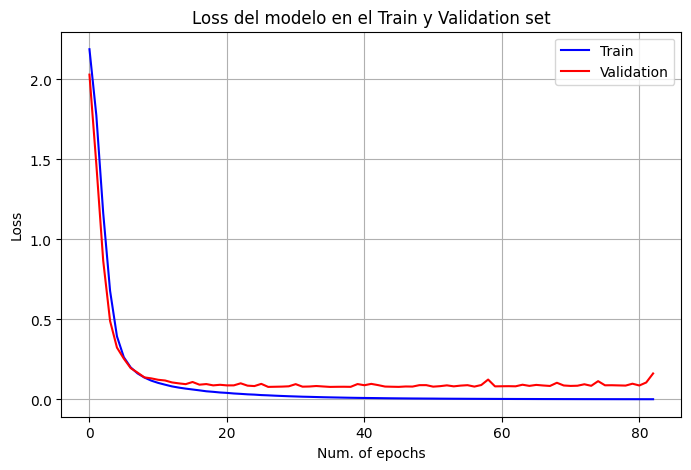

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.title("Loss del modelo en el Train y Validation set")
plt.xlabel('Num. of epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss_train, 'b', label = 'Train')
plt.plot(epochs, loss_val, 'r', label = 'Validation')
plt.grid()
plt.legend()

Matriz de confusión normalizada para el conjunto de entrenamiento

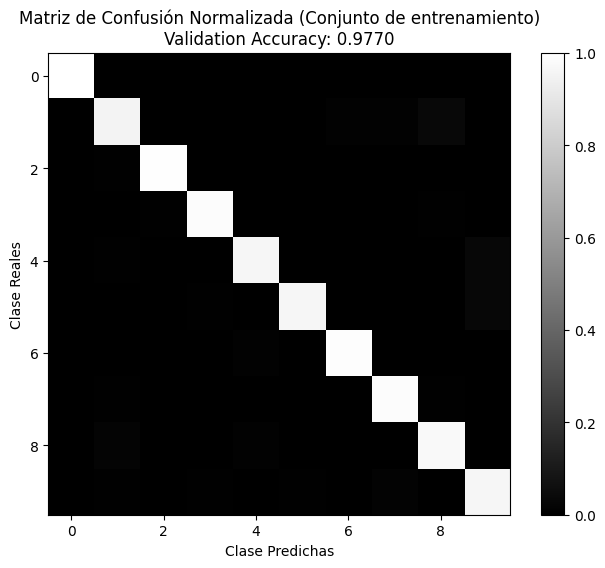

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(true_labels_train, predicts_train, normalize="true")
plt.figure(figsize=(8, 6))
plt.imshow(confusion_train, cmap=plt.cm.gray, interpolation='nearest')
plt.title(f"Matriz de Confusión Normalizada (Conjunto de entrenamiento)\nValidation Accuracy: {accuracy_val[-1]:.4f}")
plt.colorbar()
plt.xlabel("Clase Predichas")
plt.ylabel("Clase Reales")
plt.show()

Matriz de confusión normalizada para el conjunto de validación

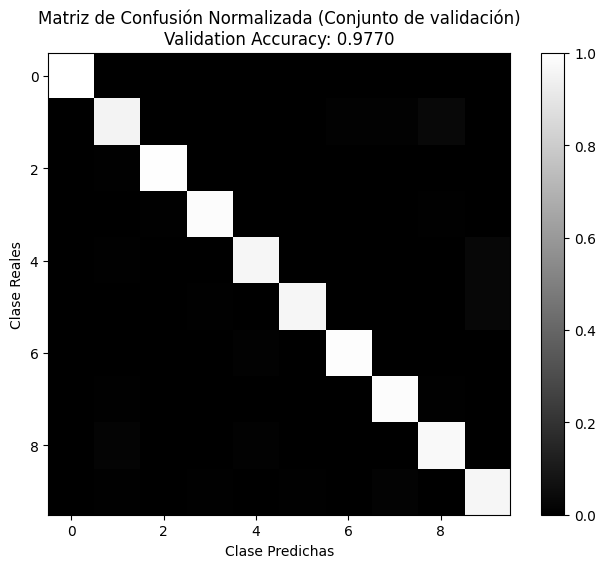

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_val = confusion_matrix(true_labels_val, predicts_val, normalize="true")
plt.figure(figsize=(8, 6))
plt.imshow(confusion_val, cmap=plt.cm.gray, interpolation='nearest')
plt.title(f"Matriz de Confusión Normalizada (Conjunto de validación)\nValidation Accuracy: {accuracy_val[-1]:.4f}")
plt.colorbar()
plt.xlabel("Clase Predichas")
plt.ylabel("Clase Reales")
plt.show()

Matriz de confusión utilizando la red en donde hubo mayor accuracy, para el conjunto de prueba